In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv")

In [11]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [12]:
df.shape

(16468, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [14]:
# there seems missing values in data . to chk missing values 
print("Number of missing values:\n", df.isnull().sum())



Number of missing values:
 Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64


In [15]:
# There's huge data with null values. so will fill with mean in integer colum & with mode in categorical column


In [16]:
# filling misin values of categorical column with mode
df_new = df.copy()
df_new['Date'].fillna(df_new['Date'].mode()[0], inplace=True)
df_new['region'].fillna(df_new['region'].mode()[0], inplace=True)
df_new['type'].fillna(df_new['type'].mode()[0], inplace=True)
# Verify if null values are filled
print("Number of missing values after removing:\n", df_new.isnull().sum())

Number of missing values after removing:
 Unnamed: 0      14951
Date                0
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type                0
year            14951
region              0
dtype: int64


In [17]:
# Fill missing values of interger column with  mean
df = df_new.fillna(df_new.mean())


In [18]:
# Check for missing values
print("Number of missing values:\n", df.isnull().sum())

Number of missing values:
 Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16468 non-null  float64
 1   Date          16468 non-null  object 
 2   AveragePrice  16468 non-null  float64
 3   Total Volume  16468 non-null  float64
 4   4046          16468 non-null  float64
 5   4225          16468 non-null  float64
 6   4770          16468 non-null  float64
 7   Total Bags    16468 non-null  float64
 8   Small Bags    16468 non-null  float64
 9   Large Bags    16468 non-null  float64
 10  XLarge Bags   16468 non-null  float64
 11  type          16468 non-null  object 
 12  year          16468 non-null  float64
 13  region        16468 non-null  object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [20]:
# unnamed column is a index which wont help to predict.so will drop it out
df.drop(columns=df.columns[df.columns.str.contains('unnamed', case=False)], inplace=True)


In [21]:
# now there's no null values present
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,16468.000000,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,16468.000000,16468.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.057313,1.345098e+06,5.909424e+05,5.075910e+05,4.180541e+04,2.299843e+05,1.964565e+05,3.586885e+04,2262.202563,0.112060
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
50%,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
75%,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [22]:
# Select the categorical columns
categorical_cols = ['Date', 'type', 'region']


In [23]:
# Perform one-hot encoding
from sklearn.preprocessing import OneHotEncoder
encoded_data = pd.get_dummies(df, columns=categorical_cols)


In [24]:
# Extract the categorical column values
cat_df = df[categorical_cols]

In [25]:
# Display the encoded dataset
print(encoded_data.head())

   AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags    year  ...  region_SouthCarolina  \
0     8603.62       93.25          0.0  2015.0  ...                     0   
1     9408.07       97.49          0.0  2015.0  ...                     0   
2     8042.21      103.14          0.0  2015.0  ...                     0   
3     5677.40      133.76          0.0  2015.0  ...                     0   
4     5986.26      197.69          0.0  2015.0  ...                     0   

   region_SouthCentral  region_Southeast  region_Spokane  region_StLouis  \
0                    0

In [26]:
encoded_data.shape

(16468, 166)

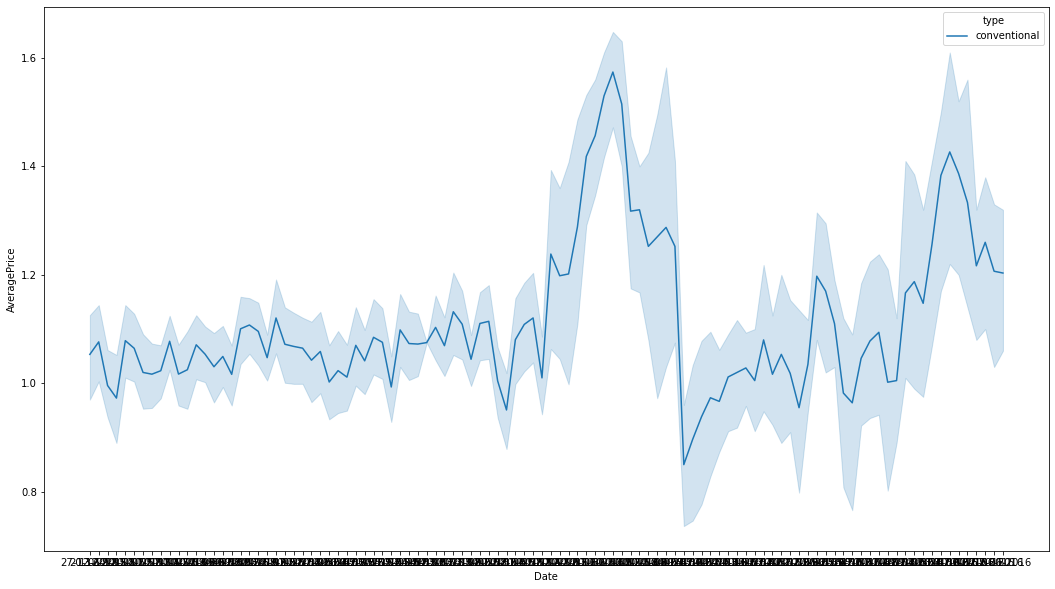

In [27]:
# chking distribution chart for price with recp to date.
plt.figure(figsize=(18,10))
sns.lineplot(x="Date", y="AveragePrice", hue='type', data=df)
plt.show()

<AxesSubplot:xlabel='AveragePrice'>

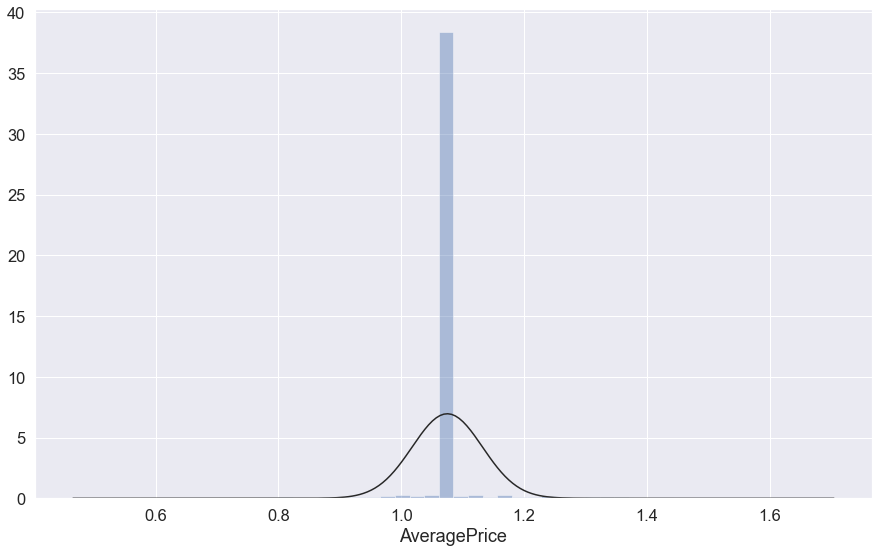

In [28]:
# to chk distribution of avr.price.
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

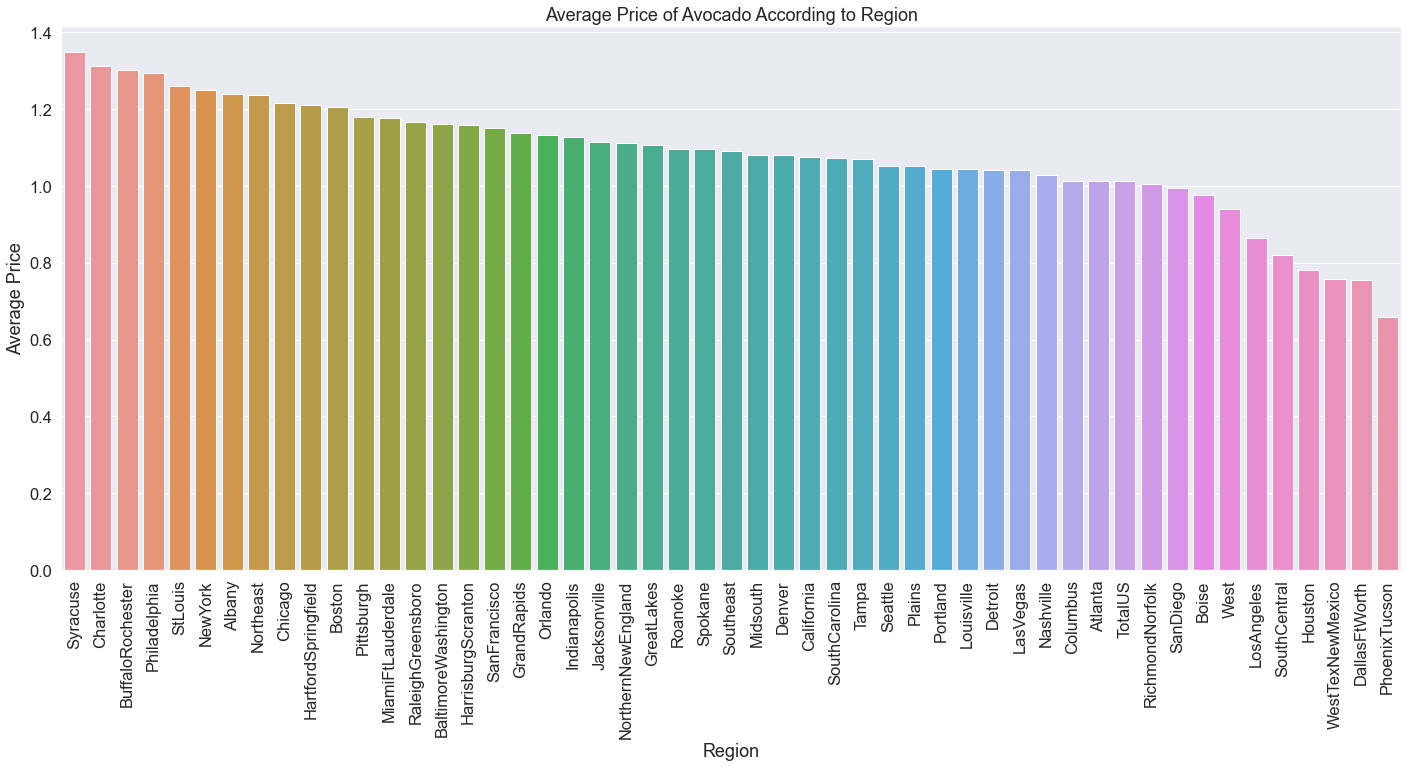

In [29]:
#chking Average price with resp. to region

region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5, 1.0, 'Average Price')

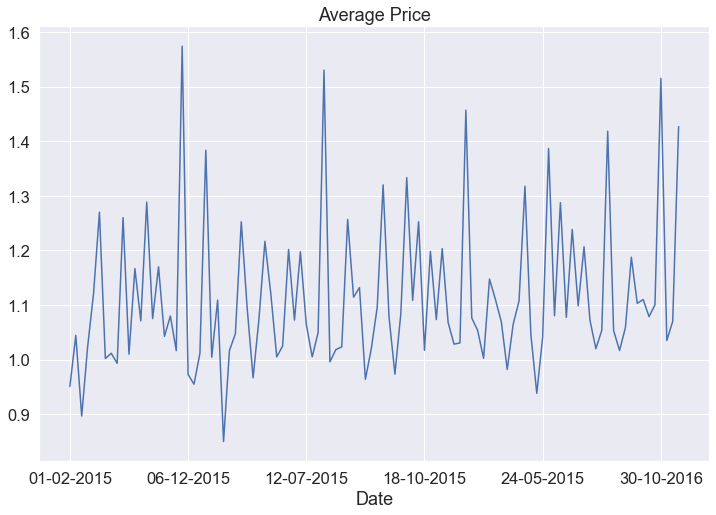

In [30]:
#Plot. avg. price with resp. to date

byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

<AxesSubplot:>

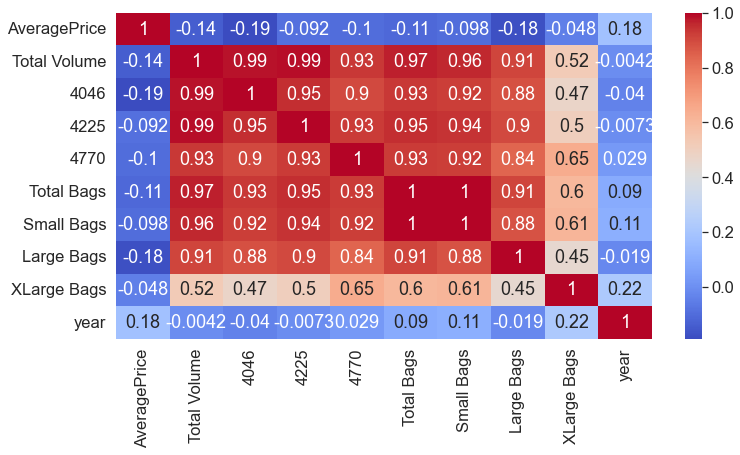

In [31]:
# checking correlation of features.
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


In [32]:
# finding outliers & setting threshold value
lower_threshold = 0.25
upper_threshold = 0.75

In [33]:
# calculating upper & lower threshold 
lower_bounds = encoded_data.quantile(lower_threshold)
upper_bounds = encoded_data.quantile(upper_threshold)

In [34]:
# Identify outlier values
outliers = ((encoded_data < lower_bounds) | (encoded_data > upper_bounds))


In [35]:
# replacing outliers with nan 
encoded_data[outliers] = np.nan

In [36]:
# dropping rows with nan value
df_cl =encoded_data.dropna()

# checking cleaned dataset.

print(df_cl.head())


      AveragePrice  Total Volume           4046           4225          4770  \
1517       1.07499  1.601879e+06  646438.654113  611437.502591  50405.495399   
1518       1.07499  1.601879e+06  646438.654113  611437.502591  50405.495399   
1519       1.07499  1.601879e+06  646438.654113  611437.502591  50405.495399   
1520       1.07499  1.601879e+06  646438.654113  611437.502591  50405.495399   
1521       1.07499  1.601879e+06  646438.654113  611437.502591  50405.495399   

         Total Bags     Small Bags    Large Bags  XLarge Bags         year  \
1517  293597.415735  248773.595287  42642.049374  2181.771074  2015.162821   
1518  293597.415735  248773.595287  42642.049374  2181.771074  2015.162821   
1519  293597.415735  248773.595287  42642.049374  2181.771074  2015.162821   
1520  293597.415735  248773.595287  42642.049374  2181.771074  2015.162821   
1521  293597.415735  248773.595287  42642.049374  2181.771074  2015.162821   

      ...  region_SouthCarolina  region_SouthCentr

In [37]:
from sklearn.preprocessing import StandardScaler


In [38]:
# selecting columns to scale.
columns_to_scale = df_cl.columns


In [39]:
# Initiate Standard Scaler
scaler = StandardScaler()

In [40]:
#seprating data in x& y
x=df_cl.drop(columns=['AveragePrice'])
y=df_cl['AveragePrice']

In [41]:
# scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1., -1.,  0., ...,  0.,  0.,  0.],
       [-1., -1.,  0., ...,  0.,  0.,  0.],
       [-1., -1.,  0., ...,  0.,  0.,  0.],
       ...,
       [-1., -1.,  0., ...,  0.,  0.,  0.],
       [-1., -1.,  0., ...,  0.,  0.,  0.],
       [-1., -1.,  0., ...,  0.,  0.,  0.]])

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=41)

In [44]:
# Using Linear Regression Model to predict Price.
from sklearn.linear_model import LinearRegression

In [45]:
lr=LinearRegression()

In [46]:
# Train the model on the training data
lr.fit(x_train, y_train)

LinearRegression()

In [47]:
y_pred = lr.predict(x_test)

In [48]:
y_pred

array([1.07499011, 1.07499011, 1.07499011, ..., 1.07499011, 1.07499011,
       1.07499011])

In [49]:
from sklearn.metrics import mean_absolute_error
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.0


In [50]:
#Hence there is 0 Error with linear Regression


In [51]:
#Also Chckig with Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [52]:
# Initiating RFG
rfg=RandomForestRegressor()

In [53]:
# Train the model on the training data
rfg.fit(x_train, y_train)

RandomForestRegressor()

In [54]:
y_pred_rfg = rfg.predict(x_test)

In [55]:
y_pred_rfg

array([1.07499011, 1.07499011, 1.07499011, ..., 1.07499011, 1.07499011,
       1.07499011])

In [56]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.0


In [57]:
# Theres 9.5 %  error. with RFG Model 
#As there's no error with Linear Regression we can use Linear Regressor Model to predict the Price.


In [58]:
# Saving  Linear Regression Model to predict the price.
import joblib

In [59]:
joblib.dump(lr, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [60]:
# Load the saved model from the file
lr = joblib.load('linear_regression_model.pkl')

In [61]:
#Now,we will  build a model to prdict a region.

In [62]:
# we will use label encoder  on target column i.e region
from sklearn.preprocessing import LabelEncoder

In [63]:
df_cl.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
1517,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,2015.162821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1518,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,2015.162821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1519,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,2015.162821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1520,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,2015.162821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1521,1.07499,1.601879e+06,646438.654113,611437.502591,50405.495399,293597.415735,248773.595287,42642.049374,2181.771074,2015.162821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
df['Date'] = pd.to_datetime(df['Date'])


In [65]:
# Convert the date column to integer
df['DateInteger'] = df['Date'].astype('int64')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          16468 non-null  datetime64[ns]
 1   AveragePrice  16468 non-null  float64       
 2   Total Volume  16468 non-null  float64       
 3   4046          16468 non-null  float64       
 4   4225          16468 non-null  float64       
 5   4770          16468 non-null  float64       
 6   Total Bags    16468 non-null  float64       
 7   Small Bags    16468 non-null  float64       
 8   Large Bags    16468 non-null  float64       
 9   XLarge Bags   16468 non-null  float64       
 10  type          16468 non-null  object        
 11  year          16468 non-null  float64       
 12  region        16468 non-null  object        
 13  DateInteger   16468 non-null  int64         
dtypes: datetime64[ns](1), float64(10), int64(1), object(2)
memory usage: 1.8+ MB


In [67]:
categorical_cols=['type', 'region']

In [68]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode 'type' column
df['type_encoded'] = label_encoder.fit_transform(df['type'])

# Encode 'region' column
df['region_encoded'] = label_encoder.fit_transform(df['region'])

# Print the updated DataFrame
print(df.head())







        Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-06-12          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type    year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015.0   
1     9505.56     9408.07       97.49          0.0  conventional  2015.0   
2     8145.35     8042.21      103.14          0.0  conventional  2015.0   
3     5811.16     5677.40      133.76          0.0  conventional  2015.0   
4     6183.95     5986.26      197.69          0.0  conventional  2015.0   

   region          DateInteger  type_encoded  region_encoded  
0  Albany  1451174400000000000             0   

In [69]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,DateInteger,type_encoded,region_encoded
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,1451174400000000000,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,1450569600000000000,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,1449964800000000000,0,0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,1434067200000000000,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,1448755200000000000,0,0


In [70]:
# Drop the original 'type' and 'region' columns, as will be using encoded one.
df_encoded = df.drop(['type', 'region','Date'], axis=1)

#  updated Dataset
print(df_encoded.head())

   AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags    year          DateInteger  \
0     8603.62       93.25          0.0  2015.0  1451174400000000000   
1     9408.07       97.49          0.0  2015.0  1450569600000000000   
2     8042.21      103.14          0.0  2015.0  1449964800000000000   
3     5677.40      133.76          0.0  2015.0  1434067200000000000   
4     5986.26      197.69          0.0  2015.0  1448755200000000000   

   type_encoded  region_encoded  
0             0               0  
1             0               0  
2             0               0 

In [71]:
#Spliting the dataset into X & Y
x=df_encoded.drop(columns=['region_encoded'])
y=df_encoded['region_encoded']

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [73]:
# building Decision Tree Classifier model to predict.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [74]:
# Initialize the Decision Tree Classifier
dcl = DecisionTreeClassifier()


In [75]:
# Train the model on the training data
dcl.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
# training Score
dcl.fit(X_train, y_train)


DecisionTreeClassifier()

In [77]:
# Predicting 
y_pred = dcl.predict(X_test)

In [78]:
y_pred

array([6, 6, 6, ..., 6, 6, 6])

In [79]:
# Evaluating the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       1.00      0.90      0.95        10
           2       0.85      0.85      0.85        13
           3       0.90      0.90      0.90        10
           4       0.92      0.80      0.86        15
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00      3020
           7       0.80      0.80      0.80         5
           9       0.93      0.93      0.93        15
          10       0.60      1.00      0.75         3
          11       0.86      0.86      0.86         7
          12       1.00      0.89      0.94         9
          13       1.00      0.62      0.77         8
          14       0.86      0.86      0.86         7
          15       0.86      0.86      0.86         7
          16       0.33      1.00      0.50         1
          17       0.83      0.62      0.71         8
          18       1.00    

In [80]:
# checking accuracy 
accuracy_score(y_test,y_pred)

0.9893746205221615

In [81]:
# Accuracy Score with Decision Tree Classifier is ~ 99%

In [82]:
# Lets Check with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [83]:
# Initiating RandomForestClassifier
RFC = RandomForestClassifier()

In [84]:
# fit the classifier into Training set
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
# Lets See Predition on testing Data
y_predrfc = RFC.predict(X_test)
y_predrfc

array([6, 6, 6, ..., 6, 6, 6])

In [86]:
# checking accuracy 
accuracy_score(y_test,y_predrfc)

0.9978749241044323

In [87]:
report = classification_report(y_test, y_predrfc)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       1.00      0.90      0.95        10
           4       1.00      0.93      0.97        15
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00      3020
           7       1.00      1.00      1.00         5
           9       1.00      1.00      1.00        15
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      0.86      0.92         7
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         8
          18       1.00    

In [88]:
# hence accuracy with RandomForestClassifier Model is 100%.
#so now we will save Random Forest Classifier Model to predict the region.


In [89]:
#  Saving the model.
joblib.dump(RFC,'random_forest_model.pkl')

['random_forest_model.pkl']

In [90]:
# Load the saved model from the file
RFC = joblib.load('random_forest_model.pkl')

In [91]:
# We will use  Decision Tree Regressor to predict price & Random Forest Classifier to predict region.